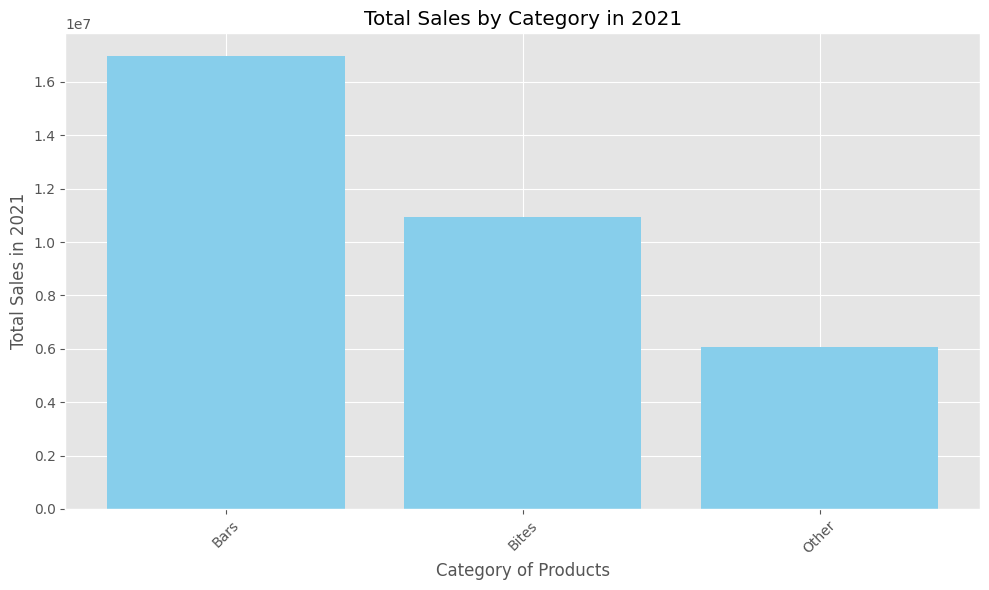


Top 5 Categories by Sales in 2021:
Bars: $16,973,726.00
Bites: $10,935,435.00
Other: $6,059,193.00


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql


def get_data(query):
    conn = pymysql.connect(
        host="localhost",
        user="root",
        password="vEhfiq-9jondy-fezjig",
        database="awesome chocolates",
    )
    cursor = conn.cursor()
    cursor.execute(f"{query}")
    data_ = cursor.fetchall()
    cursor.close()
    conn.close()
    return data_


data = get_data(
    "SELECT * FROM products "
    "inner join sales "
    "on products.PID = sales.PID "
    "inner join people "
    "on sales.SPID = people.SPID "
    "natural join geo;"
)

df = pd.DataFrame(
    data,
    columns=[
        "GeoID",
        "PID",
        "Product",
        "Category",
        "Size",
        "Cost_per_box",
        "SPID",
        "PID",
        "SaleDate",
        "Amount",
        "Customers",
        "Boxes",
        "Salesperson",
        "SPID",
        "Team",
        "Location",
        "Geo",
        "Region",
    ],
)

df["SaleDate"] = pd.to_datetime(df["SaleDate"])
df_2021 = df[df["SaleDate"].dt.year == 2021]

category_sales = df_2021.groupby("Category")["Amount"].sum().reset_index()
category_sales = category_sales.sort_values(by="Amount", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(category_sales["Category"], category_sales["Amount"], color="skyblue")
plt.xlabel("Category of Products")
plt.ylabel("Total Sales in 2021")
plt.title("Total Sales by Category in 2021")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop 5 Categories by Sales in 2021:")
for idx, row in category_sales.head().iterrows():
    print(f"{row['Category']}: ${row['Amount']:,.2f}")

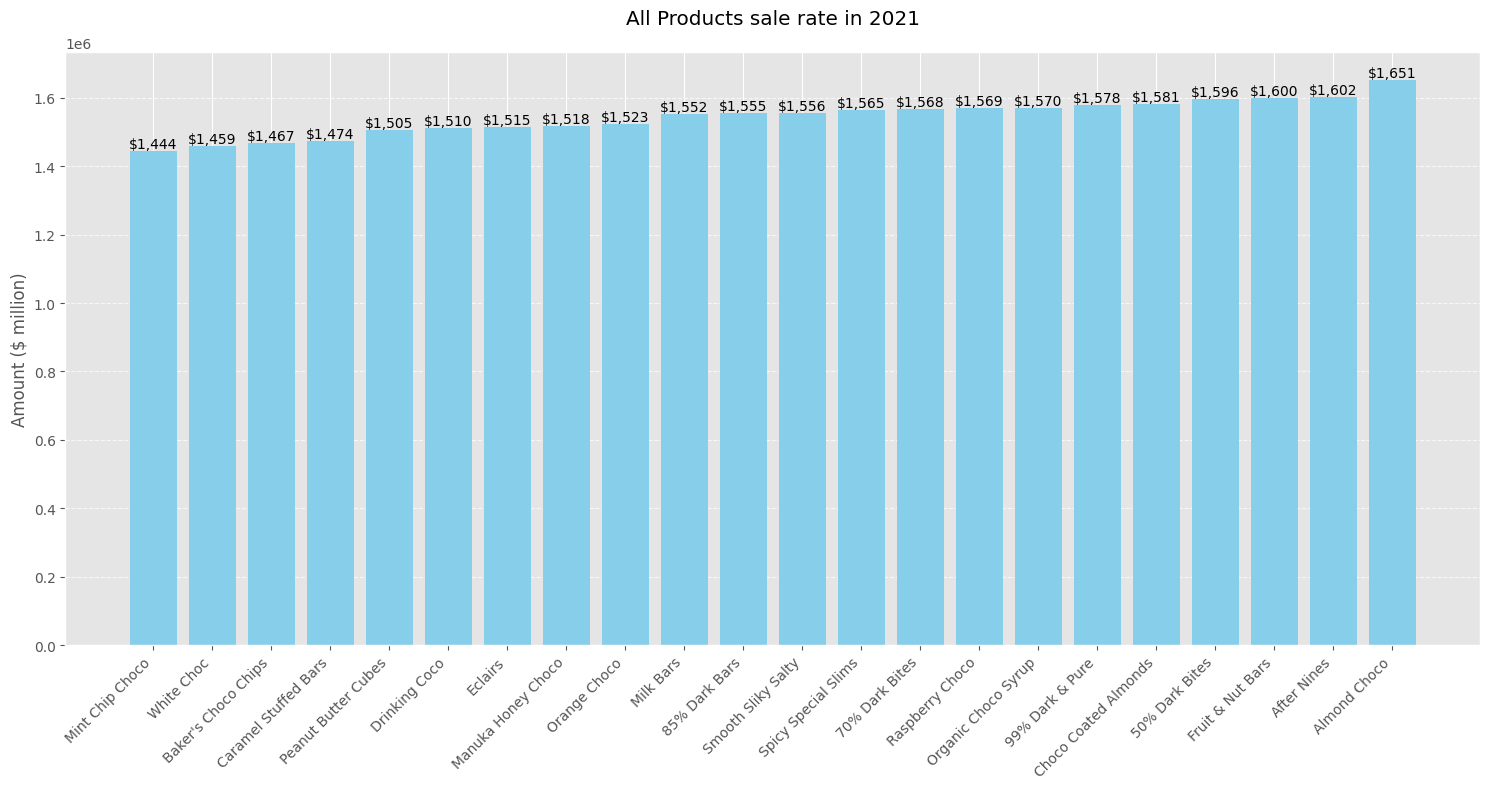

In [44]:
df = pd.DataFrame(
    data,
    columns=[
        "GeoID",
        "PID",
        "Product",
        "Category",
        "Size",
        "Cost_per_box",
        "SPID",
        "PID",
        "SaleDate",
        "Amount",
        "Customers",
        "Boxes",
        "Salesperson",
        "SPID",
        "Team",
        "Location",
        "Geo",
        "Region",
    ],
)

df["SaleDate"] = pd.to_datetime(df["SaleDate"])
df_2021 = df[df["SaleDate"].dt.year == 2021]

product_sales = df_2021.groupby("Product").agg({"Amount": "sum"}).reset_index()

product_sales_sorted = product_sales.sort_values(by="Amount", ascending=True)

plt.figure(figsize=(15, 8))
bars = plt.bar(
    range(len(product_sales_sorted)), product_sales_sorted["Amount"], color="skyblue"
)

plt.xticks(
    range(len(product_sales_sorted)),
    product_sales_sorted["Product"],
    rotation=45,
    ha="right",
)
plt.title("All Products sale rate in 2021", pad=20)
plt.ylabel("Amount ($ million)")

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"${height//1000:,.0f}",
        ha="center",
        va="bottom",
        rotation=0,
    )

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

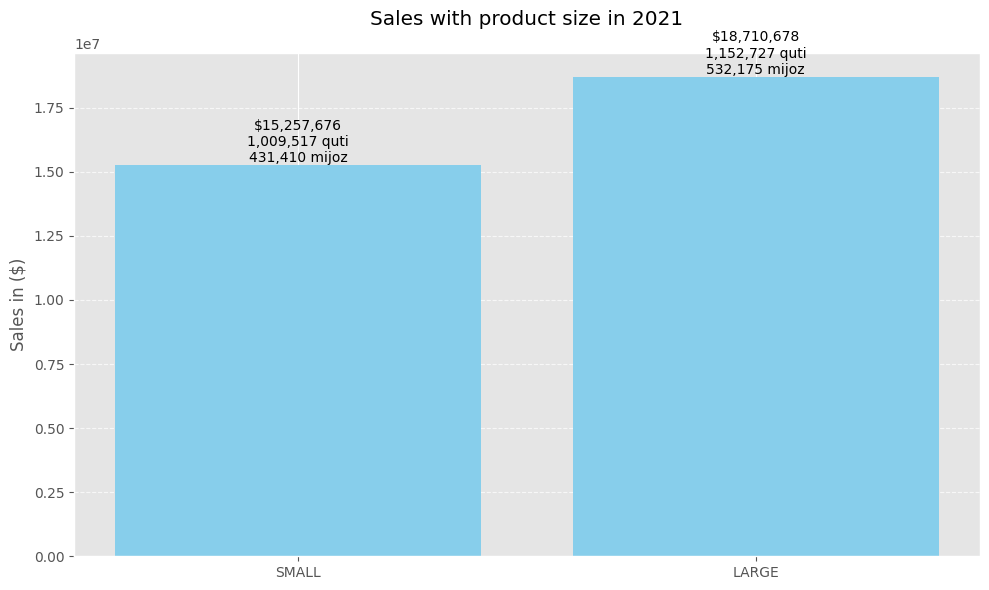

In [45]:
df = pd.DataFrame(
    data,
    columns=[
        "GeoID",
        "PID",
        "Product",
        "Category",
        "Size",
        "Cost_per_box",
        "SPID",
        "PID",
        "SaleDate",
        "Amount",
        "Customers",
        "Boxes",
        "Salesperson",
        "SPID",
        "Team",
        "Location",
        "Geo",
        "Region",
    ],
)

df["SaleDate"] = pd.to_datetime(df["SaleDate"])
df_2021 = df[df["SaleDate"].dt.year == 2021]

size_sales = (
    df_2021.groupby("Size")
    .agg({"Amount": "sum", "Boxes": "sum", "Customers": "sum"})
    .reset_index()
)

size_sales_sorted = size_sales.sort_values(by="Amount", ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    range(len(size_sales_sorted)), size_sales_sorted["Amount"], color="skyblue"
)

plt.xticks(range(len(size_sales_sorted)), size_sales_sorted["Size"], rotation=0)
plt.title("Sales with product size in 2021", pad=20)
plt.ylabel("Sales in ($)")


for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'${height:,.0f}\n{size_sales_sorted.iloc[i]["Boxes"]:,.0f} quti\n{size_sales_sorted.iloc[i]["Customers"]:,.0f} mijoz',
        ha="center",
        va="bottom",
        rotation=0,
    )

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()